In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('tip[1].csv') # Ensure the file is in the same directory
print("Dataset Preview:")
data.head()

Dataset Preview:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Define features and target
target = 'tip' # Replace with your actual target column name
X = data.drop(target, axis=1)
y = data[target]
# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define models
models = {
'Support Vector Machine': SVR(kernel='linear'),
           'Linear Regression': LinearRegression(),
'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results[model_name] = {
        'Model': model,
    'MAE': mae,
    'MSE': mse,
    'R2 Score': r2
    }
    # Print results for the current model
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")


Support Vector Machine Performance:
Mean Absolute Error (MAE): 0.6478112715714884
Mean Squared Error (MSE): 0.6511189522785261
R^2 Score: 0.4790928970164343

Linear Regression Performance:
Mean Absolute Error (MAE): 0.6671331480264893
Mean Squared Error (MSE): 0.7033566017436103
R^2 Score: 0.43730181943482516

Random Forest Performance:
Mean Absolute Error (MAE): 0.7528816326530613
Mean Squared Error (MSE): 0.9181992004081644
R^2 Score: 0.26542380040898483


In [6]:
# Identify the best model based on R^2 Score
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = results[best_model_name]['Model']
print(f"\nBest model: {best_model_name} with R^2 Score: {results[best_model_name]['R2 Score']}")


Best model: Support Vector Machine with R^2 Score: 0.4790928970164343


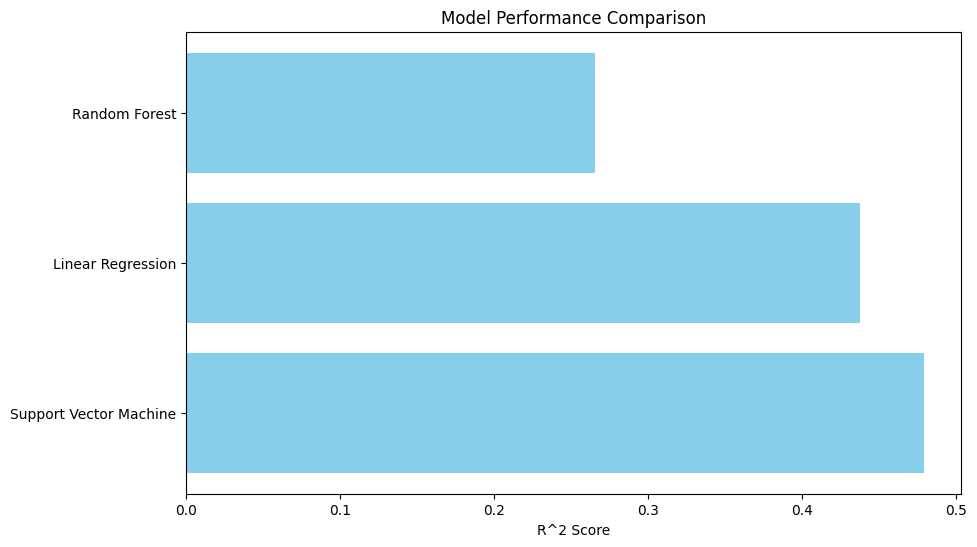

In [7]:
import matplotlib.pyplot as plt
# Visualization of R2 scores
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R^2 Score')
plt.title('Model Performance Comparison')
plt.show()